#### Dataset information for context

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.
The original dataset for year 2015 contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.
For this project I will use a subset of the 2015 BRFSS survey that consists of  253,680 survey responses. 
This dataset has 21 feature variables

--> dataset downloaded from kaggle (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download)


#### Project Goal

The goal of this project is to create a screening tool able to detect most of the prediabetics and diabetics at the cost of some healthy individual misclassification.  
Recall is therefore a very important metric in this case.  

In [1]:
import warnings
warnings.filterwarnings("ignore")# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='notebook',
                  style='white',
                  palette='pastel',
                  font='sans',
                  font_scale=1, 
                  color_codes=True,
                  rc=None)

#### 1. Import and inspect data

In [2]:
diabetes_data = pd.read_csv("raw_datasets/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
diabetes_data.shape

(253680, 22)

In [4]:
print(diabetes_data.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


#### 2. Column description 


Diabetes_012
0 = no diabetes 1 = prediabetes 2 = diabetes

HighBP
0 = no high BP 1 = high BP

HighChol
0 = no high cholesterol 1 = high cholesterol

CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI
Body Mass Index

Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

Stroke
(Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity
physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits
Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies
Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

NoDocbcCost
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

PhysHlth
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

DiffWalk
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Sex
0 = female 1 = male

Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

Income
Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 5 = less than 35,000 8 = 75,000 or more

In [5]:
print(diabetes_data.describe().T)

                         count       mean       std   min   25%   50%   75%  \
Diabetes_012          253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302 

Most columns have binary values, other categorical values  
BMI, MentHlth, PhysHlth can be considered continous

In [6]:
# check NaN:

diabetes_data.isna().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

Data is very clean. No missing values, numerical values only, most of them categorical 

#### 3. Class imbalance

In [7]:
# let's check class imbalance:

print(f"number of non-diabetic patient entries: {diabetes_data.loc[diabetes_data['Diabetes_012'] == 0].shape[0]}")
print(f"number of pre-diabetic patient entries: {diabetes_data.loc[diabetes_data['Diabetes_012'] == 1].shape[0]}")
print(f"number of     diabetic patient entries: {diabetes_data.loc[diabetes_data['Diabetes_012'] == 2].shape[0]}")

number of non-diabetic patient entries: 213703
number of pre-diabetic patient entries: 4631
number of     diabetic patient entries: 35346


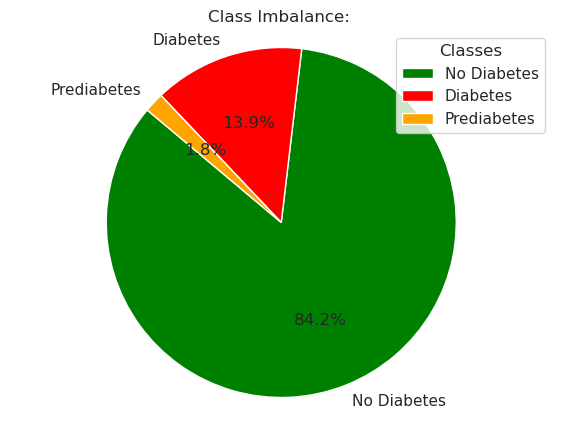

In [8]:
# we have clear class imbalance. Let's check the proportions:


class_counts = diabetes_data['Diabetes_012'].value_counts()


labels_map = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
labels = [labels_map[i] for i in class_counts.index]


# 2. Crea il grafico a torta
plt.figure(figsize=(7,5)) 
plt.pie(
    class_counts,    
    autopct='%1.1f%%',        
    startangle=140,              
    colors=['green', 'red', 'orange'] ,
    labels=labels
)


plt.title('Class Imbalance: ')
plt.legend(title="Classes", loc="upper right") 
plt.axis('equal') 
plt.show()



#### 4. Correlations

<Axes: >

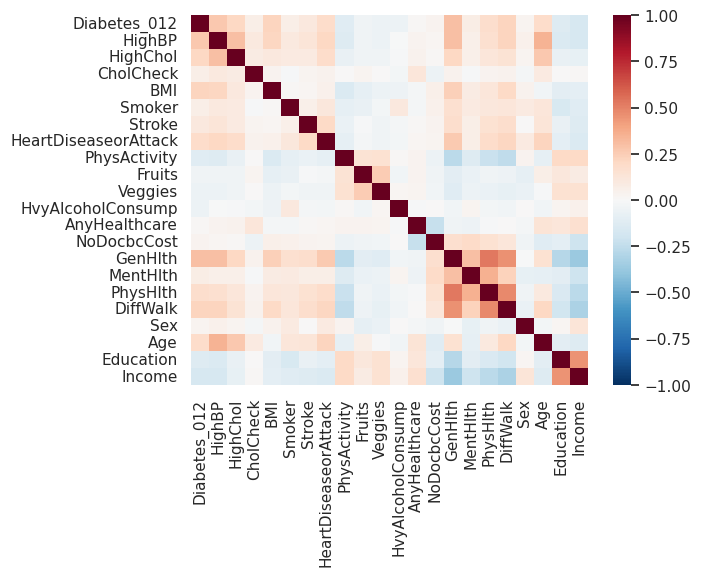

In [9]:
# Let's check correlations:

correlations = diabetes_data.corr(method='pearson')

sns.heatmap(
    data=correlations,
    vmax=1,            
    vmin=-1,            
    center=0,
    cmap='RdBu_r'
    
)

Only weak correlations exists.

Notably: high cholesterol and high BMI are clearly associated with diabetes, income and physical activity are negatively associated

#### 5. Feature analysis

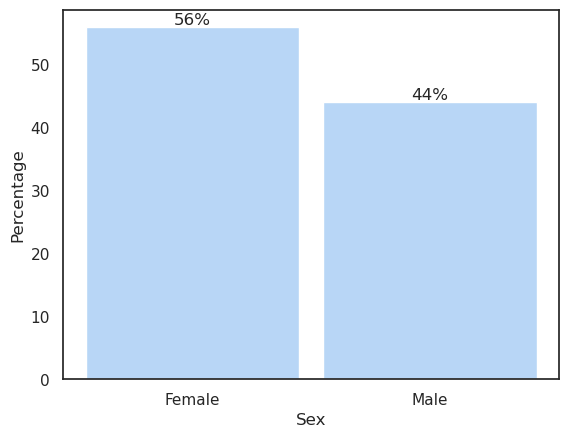

In [10]:
# let's analyse sex
#Sex 0 = female 1 = male

s = sns.histplot(
    data=diabetes_data,
    x="Sex",
    stat="percent",      
    discrete=True,
    shrink=0.9,
    legend=False
)
for c in s.containers:
    s.bar_label(c, fmt="%.0f%%")


plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.show()

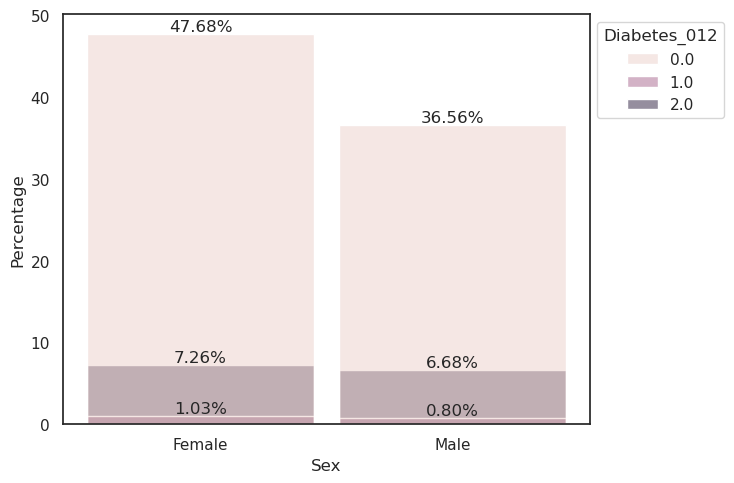

In [11]:
plt.figure(figsize=(7.5,5))
sd = sns.histplot(
    data=diabetes_data,
    x="Sex",
    stat="percent",      
    discrete=True,
    shrink=0.9,
    hue="Diabetes_012",
    legend=True
)
sns.move_legend(
    sd, 
    "upper left", 
    bbox_to_anchor=(1, 1)
)

for c in sd.containers:
    sd.bar_label(c, fmt="%.2f%%")
plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

Sex is not equally represented in the dataset, but only for healty individuals.

Prediabetics and diabetics are almost equally devided into males and females. 

According to a 2001 study:
"The overall sex ratio is roughly equal in children diagnosed under the age of 15 but while populations with the highest incidence all show male excess, the lowest risk populations studied, mostly of non-European origin, characteristically show a female bias. In contrast, male excess is a consistent finding in populations of European origin aged 15-40 years, with an approximate 3:2 male:female ratio"

Gale, E., Gillespie, K. Diabetes and gender. Diabetologia 44, 3–15 (2001). https://doi.org/10.1007/s001250051573

Sex differences in this dataset may reflect the real world U.S. landscape

In [12]:
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<Axes: xlabel='BMI', ylabel='Density'>

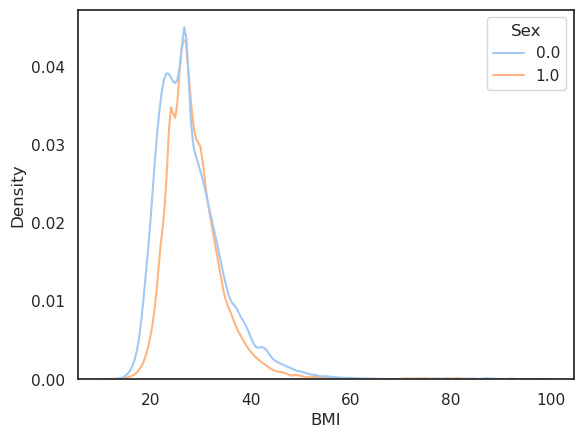

In [13]:
sns.kdeplot(
    data=diabetes_data,
    x="BMI",
    hue="Sex"
)

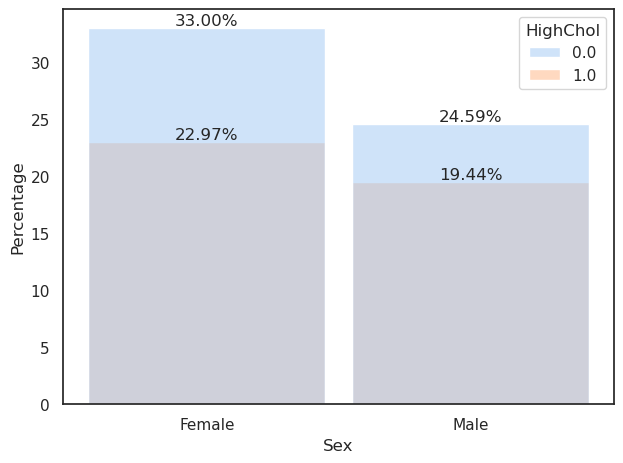

In [14]:
ch = sns.histplot(
    data=diabetes_data,
    x="Sex",
    stat="percent",      
    discrete=True,
    shrink=0.9,
    hue="HighChol",
    legend=True
)

for c in ch.containers:
    ch.bar_label(c, fmt="%.2f%%")

plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

High colesterol is very common. Men are more hit than women

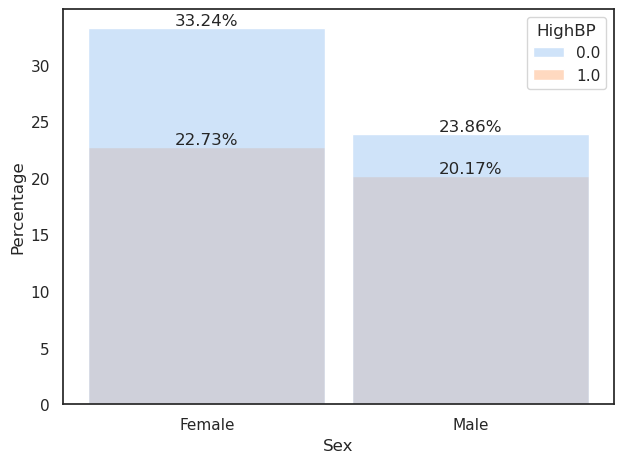

In [15]:
bp = sns.histplot(
    data=diabetes_data,
    x="Sex",
    stat="percent",      
    discrete=True,
    shrink=0.9,
    hue="HighBP",
    legend=True
)

for c in bp.containers:
    bp.bar_label(c, fmt="%.2f%%")

plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

High blood pressure is very common. Again, men are more hit than women

<Axes: xlabel='Age_Label', ylabel='Count'>

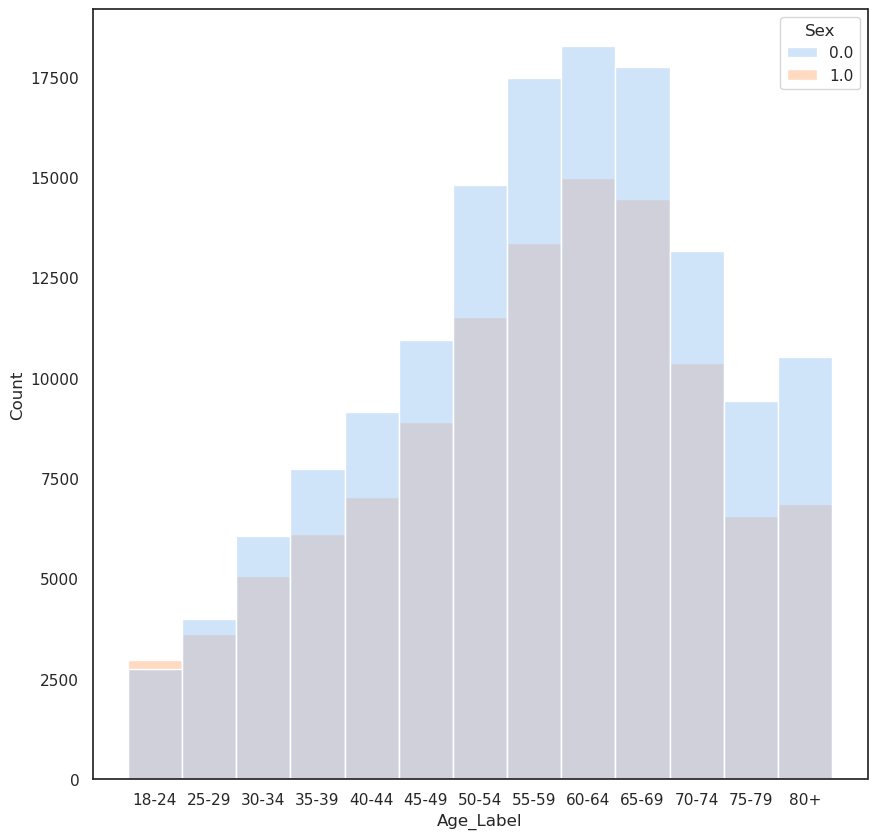

In [16]:
age_mapping = {
    1: "18-24",
    2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44", 6: "45-49",
    7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69", 11: "70-74",
    12: "75-79", 13: "80+"
}

diabetes_age=diabetes_data.copy()
diabetes_age["Age_Label"] = diabetes_age["Age"].map(age_mapping)
age_order = list(age_mapping.values())

diabetes_age["Age_Label"] = pd.Categorical(
    diabetes_age["Age_Label"], 
    categories=age_order, 
    ordered=True)

plt.figure(figsize=(10,10))
sns.histplot(
    data=diabetes_age,
    x="Age_Label",
    hue="Sex",
)

Age distributions between sex have the same shape

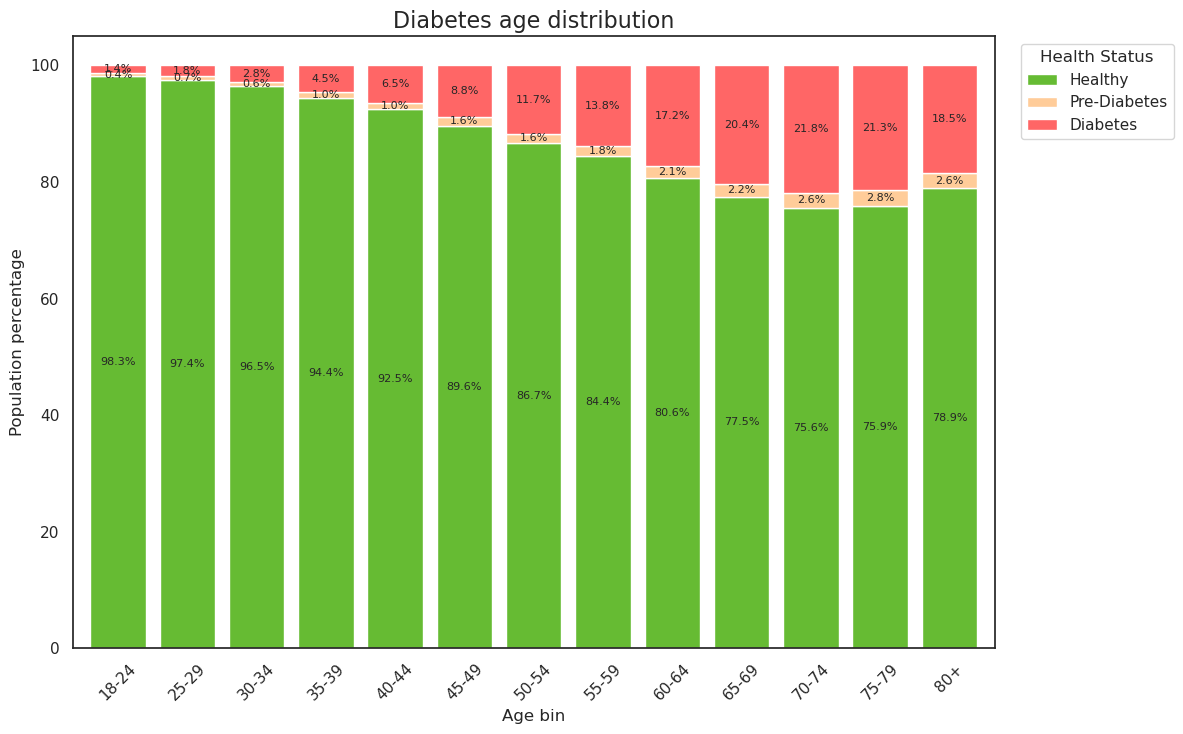

In [17]:
ct = pd.crosstab(
    diabetes_age['Age_Label'], 
    diabetes_age['Diabetes_012'], 
    normalize='index'
) * 100


percs = ct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,7.5), 
    color=["#66bb33", "#ffcc99", "#ff6666"], 
    width=0.8
)

# 3. Formattazione
plt.title("Diabetes age distribution", fontsize=16)
plt.ylabel("Population percentage", fontsize=12)
plt.xlabel("Age bin", fontsize=12)
plt.xticks(rotation=45)

plt.legend(
    title="Health Status", 
    labels=["Healthy", "Pre-Diabetes", "Diabetes"], 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left'
)

for c in percs.containers:
   labels = [f"{v.get_height():.1f}%" for v in c] 
   percs.bar_label(c, labels=labels, label_type='center', fontsize=8)



plt.tight_layout() 
plt.show()


Old people are more likely to be not healty. The trend reverses after age 75

#### 6. Dimensionality reduction
Features are mostly binary, this means that I cannot use a standard PCA. I will employ UMAP with Hamming distance setting and with Manhattan distance setting

In [23]:
# ! pip install umap-learn
import umap

In [24]:
# entire dataset
diabetes_dim = diabetes_data.iloc[: , 1:].copy()
# class vector
diabetes_cls = diabetes_data["Diabetes_012"].to_numpy()

In [37]:
X_data = diabetes_dim  
y_data = diabetes_cls  

# UMAP (Metric: Hamming)
reducer = umap.UMAP(
    n_neighbors=30,    
    min_dist=0.1,     
    metric='hamming',  
    random_state=42,
    n_jobs=-1  
)
    
X_umap = reducer.fit_transform(X_data)

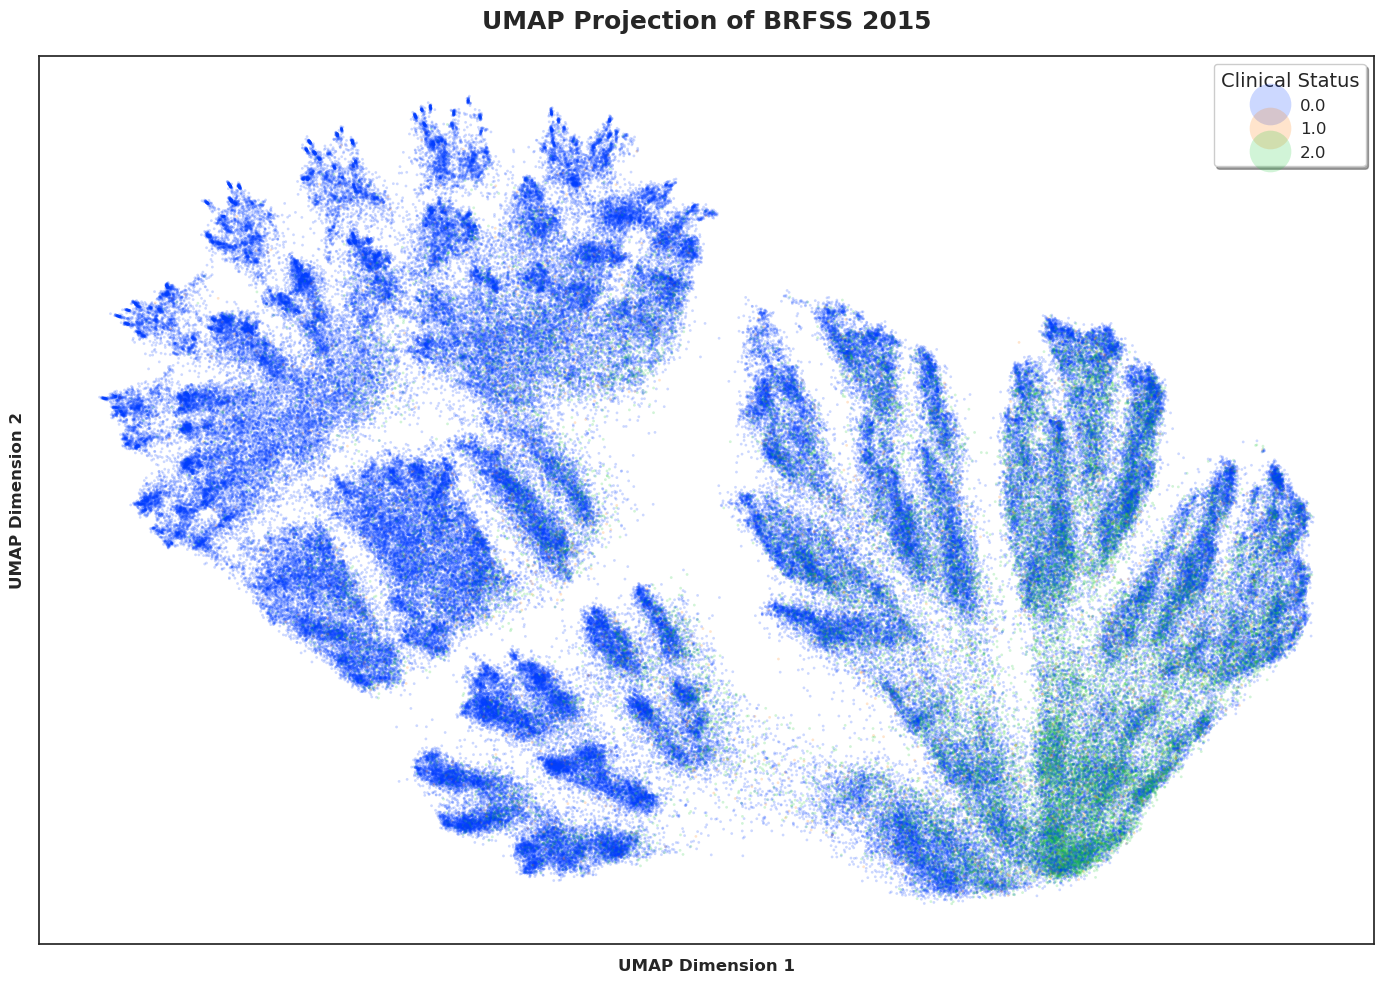

In [50]:
# plot UMAP
y_plot = pd.Series(y_data).map({
    0.0: 'Healthy (Class 0)',
    1.0: 'Prediabetic (Class 1)',
    2.0: 'Diabetic (Class 2)'
})


plt.figure(figsize=(14, 10))
ax = sns.scatterplot(
    x=X_umap[:, 0], 
    y=X_umap[:, 1],
    hue=y_data, 
    palette='bright', 
    alpha=0.2, 
    s=4, 
    linewidth=0 
)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold', labelpad=10)
plt.title('UMAP Projection of BRFSS 2015', fontsize=18, fontweight='bold', pad=20)

plt.legend(
    title='Clinical Status', 
    title_fontsize=14,
    fontsize=12,
    markerscale=15, 
    loc='best',
    frameon=True,
    shadow=True
)

plt.tight_layout()
plt.show()


In [47]:
# UMAP (Metric: Manhattan)
reducer_m = umap.UMAP(
    n_neighbors=30,    
    min_dist=0.1,     
    metric='manhattan',  
    random_state=42,
    n_jobs=-1  
)
    
X_umap_m = reducer_m.fit_transform(X_data)

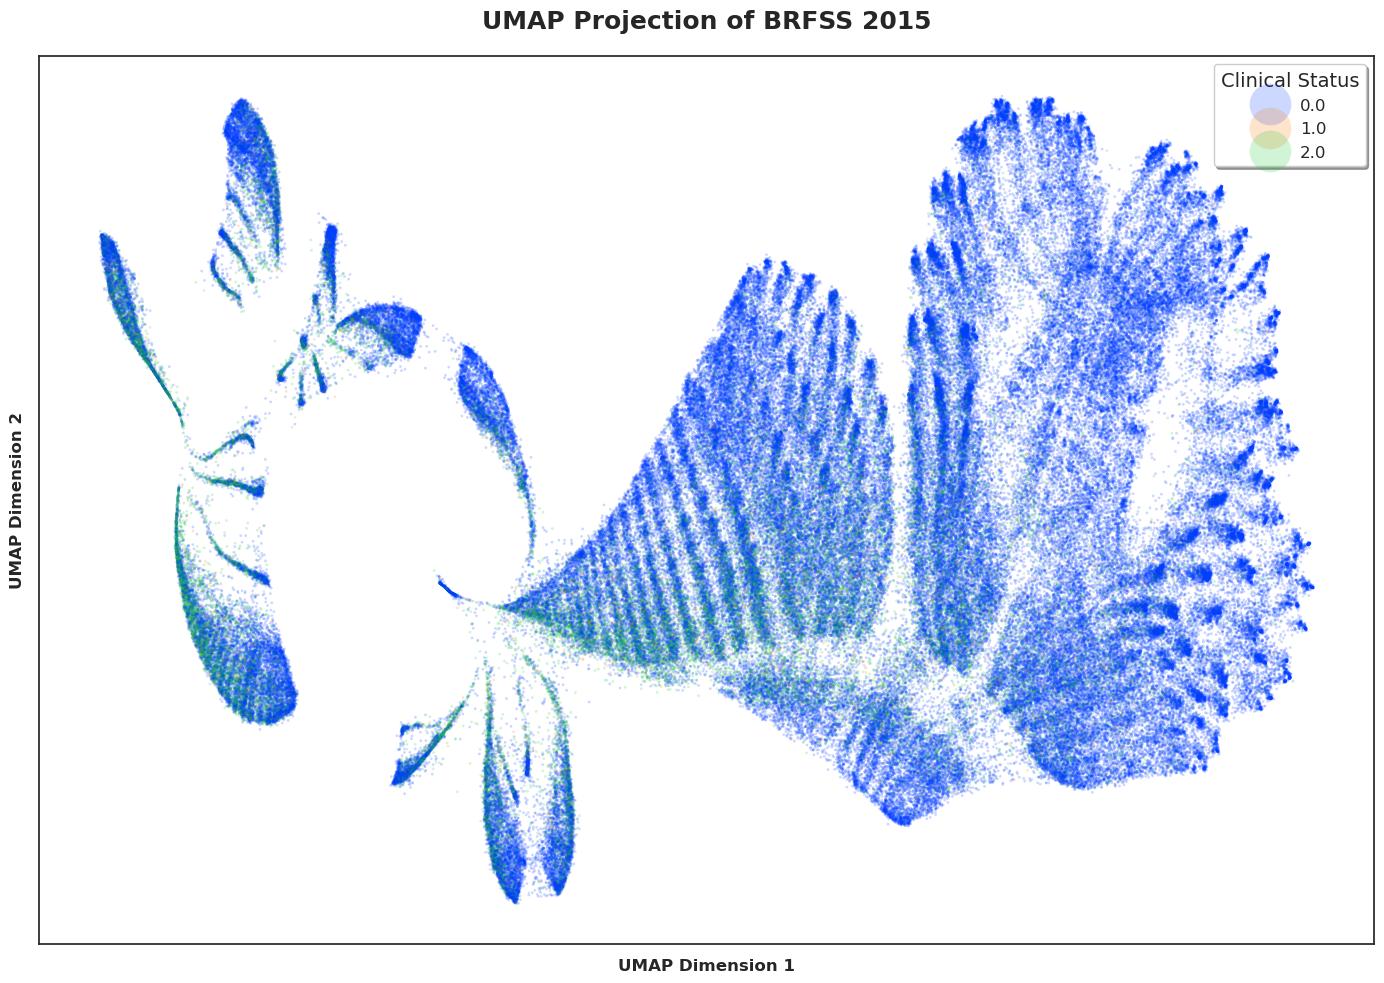

In [51]:
# plot UMAP
plt.figure(figsize=(14, 10))
axm = sns.scatterplot(
    x=X_umap_m[:, 0], 
    y=X_umap_m[:, 1],
    hue=y_data, 
    palette='bright', 
    alpha=0.2, 
    s=4, 
    linewidth=0 
)

axm.set_xticks([])
axm.set_yticks([])

axm.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold', labelpad=10)
axm.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold', labelpad=10)
plt.title('UMAP Projection of BRFSS 2015', fontsize=18, fontweight='bold', pad=20)

plt.legend(
    title='Clinical Status', 
    title_fontsize=14,
    fontsize=12,
    markerscale=15, 
    loc='best',
    frameon=True,
    shadow=True
)

plt.tight_layout()
plt.show()


There is total overlap between the classes. Prediabetes class is not visible probably due to it being extremely under-represented in the dataset.